Stock Marketデータセット

In [37]:
import os
##os.chdir(os.path.expanduser("./Users/nishiyamaakito/Desktop/"))
os.getcwd()

'/Users/nishiyamaakito/Desktop/3S/Wed3_stat'

In [38]:
import pandas as pd
Smarket = pd.read_csv('Smarket.csv')
##Smarket.head(10)

In [39]:
##list(Smarket)

In [40]:
Smarket.shape

(1250, 9)

In [41]:
##Smarket.corr()

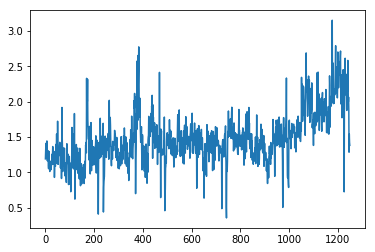

In [42]:
import matplotlib.pyplot as plt
plt.plot(Smarket[['Volume']])

In [43]:
import statsmodels.discrete.discrete_model as sm
from patsy import dmatrices
y, X = dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', Smarket, return_type = 'dataframe')
trained = sm.Logit(y['Direction[Up]'], X).fit()
trained.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction[Up]   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 May 2019   Pseudo R-squ.:                0.002074
Time:                        14:30:01   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [44]:
trained.params

Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [45]:
trained.predict()

array([0.50708413, 0.48146788, 0.48113883, ..., 0.5392683 , 0.52611829,
       0.51791656])

In [46]:
import numpy as np
predict_label = pd.DataFrame(np.zeros(1250))
predict_label.iloc[trained.predict()>0.5]=1

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y.iloc[:,1], predict_label.iloc[:, 0])

array([[145, 457],
       [141, 507]])

In [48]:
(507+145)/1250

0.5216

In [49]:
np.mean(y.iloc[:,1]==predict_label.iloc[:,0])

0.5216

In [53]:
Smarket_2005 = Smarket.query('Year >= 2005')
Smarket_2005.shape

(252, 9)

In [58]:
Smarket_train = Smarket.query('Year < 2005')

In [59]:
Smarket_train.shape

(998, 9)

In [61]:
y_train, X_train = dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', Smarket_train, return_type = 'dataframe')
trained = sm.Logit(y_train['Direction[Up]'], X_train).fit()
trained.summary()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction[Up]   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 May 2019   Pseudo R-squ.:                0.001562
Time:                        14:36:26   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
                                        LLR p-value:                    0.9044
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.377      -0.147       0.056
Lag3           0.0072      0.052      0.139      0.889      -0.094       0.108
Lag4           0.0064      0.052      0.125      0.901      -0.095       0.108
Lag5          -0.0042      0.051     -0.083      0.934      -0.104       0.096
Volume        -0.1163      0.240     -0.485      0.628      -0.586       0.353
==============================================================================
"""

In [62]:
y_test, X_test = dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', Smarket_2005, return_type = 'dataframe')
preds = trained.predict(X_test)
predict_label = pd.DataFrame(np.zeros(shape=(len(X_test), 1)))
mark = (preds > 0.5).reset_index(drop=True)
predict_label.loc[mark] = 1
confusion_matrix(y_test.iloc[:, 1], predict_label.iloc[:, 0])

array([[77, 34],
       [97, 44]])

In [63]:
(77 + 44) / 252

0.4801587301587302

In [64]:
y_train, X_train = dmatrices('Direction ~ Lag1 + Lag2', Smarket_train, return_type = 'dataframe')
trained = sm.Logit(y_train['Direction[Up]'], X_train).fit()
y_test, X_test = dmatrices('Direction ~ Lag1 + Lag2', Smarket_2005, return_type = 'dataframe')
preds = trained.predict(X_test)
predict_label = pd.DataFrame(np.zeros(shape=(len(X_test), 1)))
mark = (preds > 0.5).reset_index(drop=True)
predict_label.loc[mark] = 1
np.mean(y_test.iloc[:, 1].values == predict_label.iloc[:, 0].values)

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


0.5595238095238095

In [65]:
newdata = pd.DataFrame({'Direction': np.zeros(2), 'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]})
X_test = dmatrices('Direction ~ Lag1 + Lag2', newdata, return_type = 'dataframe')[1]
trained.predict(X_test)

0    0.479146
1    0.496094
dtype: float64